# An exploration of beer names

1. Look for longest and shortest beer names
2. Brewery names by wordcount/letter
3. Non ASCII chars in names
4. Find the Umlauts!
4. How many single word breweries? 
5. Some interesting correlations?







In [1]:
""" loading libraries"""
from IPython.display import display, HTML

from datetime import datetime
from csv import DictReader, reader
import sys
import csv
from collections import defaultdict
%matplotlib inline
import csv
import pandas as pd    #pip install pandas
import matplotlib.pyplot as plt
import numpy as np
import re

pd_beer= pd.read_csv('../input/beers.csv')
pd_brew = pd.read_csv('../input/breweries.csv')
pd_beer.drop('Unnamed: 0',axis=1,inplace =True)
 

## Look for the longest beer names
Histogram of number of words in beer names

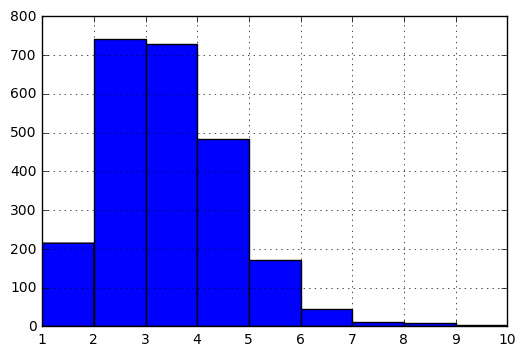

In [2]:
pd_beer['words']=pd_beer['name'].apply(lambda x :len(str.split(x,' ')))
pd_beer['words'].hist(bins=9)

# The longest beers
List of beers with 7 or more words

In [3]:
pd_long = pd_beer[pd_beer.words >7] 
display(HTML(pd_long[['name','style']].to_html(index=False)))

name,style
"the Kimmie, the Yink and the Holy Gose",Gose
Moe's Original Bar B Que 'Bama Brew Golden Ale,American Blonde Ale
Black Star Double Hopped Golden Lager (24 oz.),American Pale Lager
Black Star Double Hopped Golden Lager (12 oz.),American Pale Lager
Hop A Potamus Double Dark Rye Pale Ale,Rye Beer
40th Annual Bix Street Fest Copper Ale (Current),American Amber / Red Ale
668 Neighbor of the Beast (16 oz.) (2010),Belgian Pale Ale
Bourbon Barrel Batch 666: Sympathy for the Devil,Belgian Dark Ale
Lee Hill Series Vol. 5 - Belgian Style Quadrup...,Quadrupel (Quad)
Lee Hill Series Vol. 4 - Manhattan Style Rye Ale,Rye Beer


## Historgram of letters in beer names

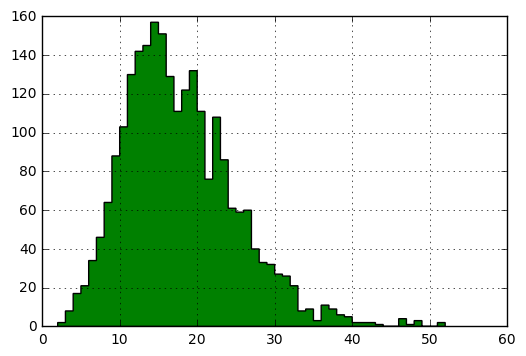

In [4]:
pd_beer['letter_count']=pd_beer['name'].apply(lambda x :len(x))
pd_beer['letter_count'].hist(bins=50,histtype ='stepfilled',color='green',label='Histogram of characters in beer name')

## List of shortest beer names
* Shortest contains 2 characters
* Shortest word contains 3 characters

In [5]:
pd_short_beer=pd_beer[pd_beer['letter_count']<=3]
pd_short_beer[ [ 'name','style'] ]


display(HTML(pd_short_beer[['name','style']].to_html(index=False)))

name,style
IPA,American IPA
MCA,American IPA
805,American Blonde Ale
KSA,Kölsch
#9,Fruit / Vegetable Beer
#9,Fruit / Vegetable Beer
Dad,American Amber / Red Ale
Zen,American Pale Ale (APA)
Rad,Fruit / Vegetable Beer
WET,American IPA


 ## Find unusual characters and unicode in names

 éè’’í™’‘ä°ü°/°ö

In [6]:
all_words = []
for a,b in pd_beer.name.iteritems():
    x = b.split(' ')
    all_words.extend(x) 
         

# non ascii characters 
print ("Non ascii characters in the names:")
unusual_chars=set()
for x in all_words:
    res  =re.sub('[0-9a-zA-Z()]+', '', x)
    if len(res)>0:
        
        
       unusual_chars.add(res) 
print  (unusual_chars )  
print ("\n" )       

res = pd.DataFrame()
for x in unusual_chars:
    if len(x)>0:    
      res =  pd_beer[pd_beer.name.str.contains(re.escape(str(x)))]
      print (x,' found ',len(res),' times')
      #print (res[['name']])
  
   
        
        
       

Non ascii characters in the names:
{'-', '!', '--', '..', '‘', "'", '™', '’', ':', '°/°', 'ö', 'ü', 'ä', '//', '?', '#:', 'é', '’’', "''", '&', '.', 'è', ',', 'í', '°', '...', '#', '....'}


-  found  57  times
!  found  10  times
--  found  0  times
..  found  0  times
‘  found  1  times
'  found  175  times
™  found  3  times
’  found  15  times
:  found  6  times
°/°  found  0  times
ö  found  16  times
ü  found  2  times
ä  found  1  times
//  found  0  times
?  found  1  times
#:  found  0  times
é  found  3  times
’’  found  0  times
''  found  0  times
&  found  13  times
.  found  43  times
è  found  1  times
,  found  2  times
í  found  2  times
°  found  3  times
...  found  0  times
#  found  13  times
....  found  0  times


## Beer with foreign letters(unlauts,degree,TM and a few )

In [7]:
unlauts_and_such ={ 'è', 'ä', 'ö', 'é', 'í', '™', 'ü', '°'}

res = pd.DataFrame()
for x in unlauts_and_such:
    if len(x)>0:    
      res =  res.append (pd_beer[pd_beer.name.str.contains(re.escape(str(x)))])
       
display(HTML(res[['name','style']].to_html(index=False)))

name,style
José Martí American Porter,American Porter
Na Zdraví Pilsner,Czech Pilsener
14° ESB,Extra Special / Strong Bitter (ESB)
32°/50° Kölsch,Kölsch
360° India Pale Ale,American IPA
Kentucky Kölsch,Kölsch
Aslan Kölsch,Kölsch
Kölsch 151,Kölsch
Post Time Kölsch,Kölsch
32°/50° Kölsch,Kölsch


## List of unusual unicode charcters and beer names

### Some interesting observations:
* Only three Trademark symbols from seperate breweries suggesting possible cut and paste artifact.
    
* The Degree symobol (°) was used in three beer names.
    
* Most of the umlauts(ö) were Kölsch related.
    
* Technically a unicode "Right single quotation mark"(\xe2\x80\x99) was used in place of 
    apostrophes 15 times. Left single quoatation mark used once.(\xe2\x80\x98))
    
* Havanüther is not an actual dictionary word.

## There are only two one word Breweries!
* The one word breweries
* Histogram of number of words in brewery names

name,city
Mikkeller,Pottstown
Ciderboys,Stevens Point


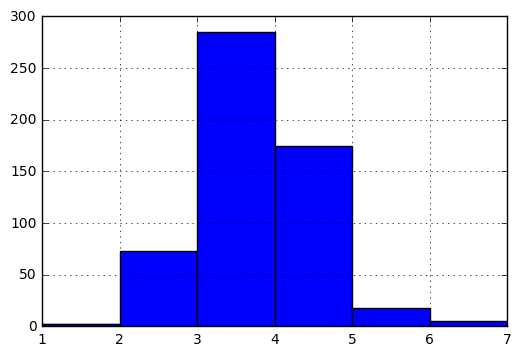

In [8]:
 
pd_brew['words']=pd_brew['name'].apply(lambda x :len(str.split(x,' ')))
short_brew = pd_brew [pd_brew['words']==1]


pd_brew['words'].hist(bins=6)
display(HTML(short_brew[['name','city']].to_html(index=False)))




## Some interesting Correlations:

1. Alcohol and hops are very correlated. Surpringly strong association (to me.)
2. Alcohol and bottle size are correlated.  Are bigger bottles used for cellaring of higher alcohol styles?
3. Brewery_id and letter_count seem correlated. Do newer breweries pick longer names?
4. Much weaker ibu/ounces correlation than abv. suggests a preference for more abv over hops
5. Apparent negative correlation between brewery_id and ounces.Do newer breweries brew more standard 12 oz beers? 

In [9]:
pd_beer.corr()

,abv,ibu,id,brewery_id,ounces,words,letter_count
abv,1.000000,0.670621,0.042811,-0.098632,0.172529,0.034976,0.012590
ibu,0.670621,1.000000,0.000485,-0.004875,0.054691,0.025399,-0.043941
id,0.042811,0.000485,1.000000,-0.504030,0.100843,-0.237985,-0.267155
brewery_id,-0.098632,-0.004875,-0.504030,1.000000,-0.133762,0.196527,0.195510
ounces,0.172529,0.054691,0.100843,-0.133762,1.000000,-0.017939,-0.031237
words,0.034976,0.025399,-0.237985,0.196527,-0.017939,1.000000,0.890347
letter_count,0.012590,-0.043941,-0.267155,0.195510,-0.031237,0.890347,1.000000
